In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations

path ='C:\\CRA-Assignment\Proj2\\'
file_path1 = path + 'card.xlsx'
df1 = pd.read_excel(file_path1)
file_path2 = path + 'CRE.xlsx'
df2 = pd.read_excel(file_path2)
df1["chargeoff_rate_card"]=df1["chargeoffs"]/df1["loans"]
df2["chargeoff_rate_cre"]=df2["chargeoffs"]/df2["loans"]

print('Augmented Dickey Fuller for Credit Cards')
print(adfuller(df1["chargeoff_rate_card"])[1])
print('-----')

print('Augmented Dickey Fuller for CRE')
print(adfuller(df2["chargeoff_rate_cre"])[1])


Augmented Dickey Fuller for Credit Cards
0.05327023403448074
-----
Augmented Dickey Fuller for CRE
0.48912908490137535


Obviously CRE is not stationary, so take the difference for the CRE.

And for Cards, it is stationary.

Augmented Dickey Fuller for CRE after Taking the Difference
0.013481545256850738
Charge off rate for CRE is stationary after taking the difference




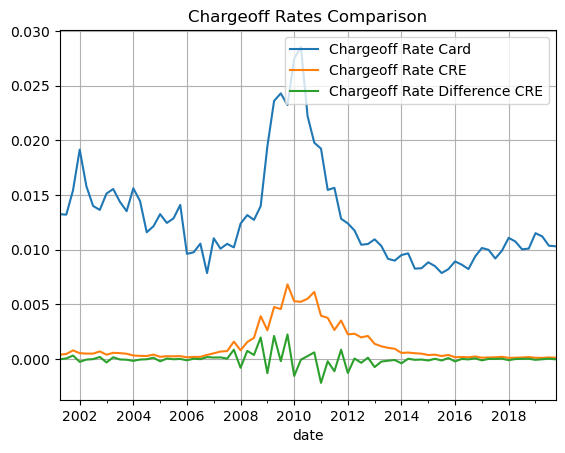

In [3]:
data = pd.merge(df1[['date','chargeoff_rate_card']],df2[['date','chargeoff_rate_cre']],on='date')

#Take the difference for CRE
data['chargeoff_rate_cre_diff'] = data['chargeoff_rate_cre'].diff()
data = data.dropna(subset=['chargeoff_rate_cre_diff'])#delete the rows which have NaN, making sure the following data was aligned.
print('Augmented Dickey Fuller for CRE after Taking the Difference')
p_value = adfuller(data["chargeoff_rate_cre_diff"])[1]
print(p_value)
if p_value < 0.05:
    print('Charge off rate for CRE is stationary after taking the difference')  

print('\n')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data["chargeoff_rate_card"].plot()
data["chargeoff_rate_cre"].plot()
data["chargeoff_rate_cre_diff"].plot()

plt.legend(["Chargeoff Rate Card", "Chargeoff Rate CRE", "Chargeoff Rate Difference CRE"])  # List the labels in the order of plotting
plt.title("Chargeoff Rates Comparison")  # Set the title for the plot
plt.grid()
plt.show()


In [4]:
data = data.drop(columns=['chargeoff_rate_cre'])

In [5]:
def head_n_tail(df):
    print('First Three Rows of Data')
    print(df.head(3))
    print('-----')
    print('Last Three Rows of Data')
    print(df.tail(3))
    print(type(df))
    print(df.shape)

    
head_n_tail(data)

First Three Rows of Data
            chargeoff_rate_card  chargeoff_rate_cre_diff
date                                                    
2001-06-30             0.013246                -0.000014
2001-09-30             0.013205                 0.000062
2001-12-31             0.015420                 0.000327
-----
Last Three Rows of Data
            chargeoff_rate_card  chargeoff_rate_cre_diff
date                                                    
2019-06-30             0.011221                -0.000010
2019-09-30             0.010365                 0.000039
2019-12-31             0.010312                -0.000018
<class 'pandas.core.frame.DataFrame'>
(75, 2)


In [6]:
#Since the explanatory variables need to be from the period before the charge-off, the data starting from December 1, 2000, should be read.
unrate = web.DataReader("UNRATE", "fred", start = '2000-12-01')
DCO = web.DataReader("DCOILBRENTEU", "fred", start = '2000-12-01').resample('ME').last()#just resample the last day of month to align the data
GDP = web.DataReader("GDP", "fred", start = '2000-10-01')#Since GDP is released quarterly, align the GDP data with other data by date.
T10Y2Y = web.DataReader("T10Y2Y", "fred", start = '2000-12-01').resample('ME').last()#just resample the last day of month to align the data
vix = web.DataReader('VIXCLS', 'fred', start = '2000-12-28').resample('ME').last()

In [7]:
from datetime import timedelta
data['new_date'] = data.index + timedelta(days = -100)
data['month'] = data.new_date.dt.month
data['year'] = data.new_date.dt.year
head_n_tail(data)

First Three Rows of Data
            chargeoff_rate_card  chargeoff_rate_cre_diff   new_date  month  \
date                                                                         
2001-06-30             0.013246                -0.000014 2001-03-22      3   
2001-09-30             0.013205                 0.000062 2001-06-22      6   
2001-12-31             0.015420                 0.000327 2001-09-22      9   

            year  
date              
2001-06-30  2001  
2001-09-30  2001  
2001-12-31  2001  
-----
Last Three Rows of Data
            chargeoff_rate_card  chargeoff_rate_cre_diff   new_date  month  \
date                                                                         
2019-06-30             0.011221                -0.000010 2019-03-22      3   
2019-09-30             0.010365                 0.000039 2019-06-22      6   
2019-12-31             0.010312                -0.000018 2019-09-22      9   

            year  
date              
2019-06-30  2019  
2019-09-30 

In [8]:
unrate['new_date'] = unrate.index
unrate['month'] = unrate.new_date.dt.month
unrate['year'] = unrate.new_date.dt.year

DCO['new_date'] = DCO.index
DCO['month'] = DCO.new_date.dt.month
DCO['year'] = DCO.new_date.dt.year

GDP['new_date'] = GDP.index+ timedelta(days = -1)#align the GDP data with other factors
GDP['month'] = GDP.new_date.dt.month
GDP['year'] = GDP.new_date.dt.year

T10Y2Y['new_date'] = T10Y2Y.index
T10Y2Y['month'] = T10Y2Y.new_date.dt.month
T10Y2Y['year'] = T10Y2Y.new_date.dt.year

vix['new_date'] = vix.index
vix['month'] = vix.new_date.dt.month
vix['year'] = vix.new_date.dt.year

head_n_tail(unrate)
print('\n')
head_n_tail(DCO)
print('\n')
head_n_tail(GDP)
print('\n')
head_n_tail(T10Y2Y)
print('\n')
head_n_tail(vix)

First Three Rows of Data
            UNRATE   new_date  month  year
DATE                                      
2000-12-01     3.9 2000-12-01     12  2000
2001-01-01     4.2 2001-01-01      1  2001
2001-02-01     4.2 2001-02-01      2  2001
-----
Last Three Rows of Data
            UNRATE   new_date  month  year
DATE                                      
2024-04-01     3.9 2024-04-01      4  2024
2024-05-01     4.0 2024-05-01      5  2024
2024-06-01     4.1 2024-06-01      6  2024
<class 'pandas.core.frame.DataFrame'>
(283, 4)


First Three Rows of Data
            DCOILBRENTEU   new_date  month  year
DATE                                            
2000-12-31         22.58 2000-12-31     12  2000
2001-01-31         26.59 2001-01-31      1  2001
2001-02-28         25.16 2001-02-28      2  2001
-----
Last Three Rows of Data
            DCOILBRENTEU   new_date  month  year
DATE                                            
2024-05-31         79.41 2024-05-31      5  2024
2024-06-30         

In [9]:
GDP['GDP_prev'] = GDP['GDP'].shift(1)
GDP['GDP_growth'] = (GDP['GDP'] - GDP['GDP_prev']) / GDP['GDP_prev']
GDP.drop('GDP_prev', axis=1, inplace=True)
#GDP_growth=GDP[new_date,'GDP_growth']
print(GDP.head())

                  GDP   new_date  month  year  GDP_growth
DATE                                                     
2000-10-01  10435.744 2000-09-30      9  2000         NaN
2001-01-01  10470.231 2000-12-31     12  2000    0.003305
2001-04-01  10599.000 2001-03-31      3  2001    0.012299
2001-07-01  10598.020 2001-06-30      6  2001   -0.000092
2001-10-01  10660.465 2001-09-30      9  2001    0.005892


In [10]:
DCO['DCO_prev'] = DCO['DCOILBRENTEU'].shift(1)
DCO['DCO_growth'] = (DCO['DCOILBRENTEU'] - DCO['DCO_prev']) / DCO['DCO_prev']
DCO.drop('DCO_prev', axis=1, inplace=True)
#DCO_growth=DCO[new_date,'DCO_growth']
print(DCO.head())
print(DCO[5:20])

            DCOILBRENTEU   new_date  month  year  DCO_growth
DATE                                                        
2000-12-31         22.58 2000-12-31     12  2000         NaN
2001-01-31         26.59 2001-01-31      1  2001    0.177591
2001-02-28         25.16 2001-02-28      2  2001   -0.053780
2001-03-31         23.50 2001-03-31      3  2001   -0.065978
2001-04-30         27.21 2001-04-30      4  2001    0.157872
            DCOILBRENTEU   new_date  month  year  DCO_growth
DATE                                                        
2001-05-31         28.55 2001-05-31      5  2001    0.049247
2001-06-30         26.21 2001-06-30      6  2001   -0.081961
2001-07-31         24.35 2001-07-31      7  2001   -0.070965
2001-08-31         26.80 2001-08-31      8  2001    0.100616
2001-09-30         21.87 2001-09-30      9  2001   -0.183955
2001-10-31         19.63 2001-10-31     10  2001   -0.102423
2001-11-30         18.92 2001-11-30     11  2001   -0.036169
2001-12-31         19.35

In [11]:
data2 = pd.merge(data,unrate[['year','month','UNRATE']],on = ['year','month'], how = 'left')
data3 = pd.merge(data2,DCO[['year','month','DCOILBRENTEU']],on = ['year','month'], how = 'left')
data4 = pd.merge(data3,GDP[['year','month','GDP']],on = ['year','month'], how = 'left')
data5 = pd.merge(data4,T10Y2Y[['year','month','T10Y2Y']],on = ['year','month'], how = 'left')
data6 = pd.merge(data5,vix[['year','month','VIXCLS']],on = ['year','month'], how = 'left')
data7 = pd.merge(data6,GDP[['year','month','GDP_growth']],on = ['year','month'], how = 'left')
data8 = pd.merge(data7,DCO[['year','month','DCO_growth']],on = ['year','month'], how = 'left')#data8 load the final merge data
head_n_tail(data8)

First Three Rows of Data
   chargeoff_rate_card  chargeoff_rate_cre_diff   new_date  month  year  \
0             0.013246                -0.000014 2001-03-22      3  2001   
1             0.013205                 0.000062 2001-06-22      6  2001   
2             0.015420                 0.000327 2001-09-22      9  2001   

   UNRATE  DCOILBRENTEU        GDP  T10Y2Y  VIXCLS  GDP_growth  DCO_growth  
0     4.3         23.50  10599.000    0.75   28.64    0.012299   -0.065978  
1     4.5         26.21  10598.020    1.17   19.06   -0.000092   -0.081961  
2     5.0         21.87  10660.465    1.74   31.93    0.005892   -0.183955  
-----
Last Three Rows of Data
    chargeoff_rate_card  chargeoff_rate_cre_diff   new_date  month  year  \
72             0.011221                -0.000010 2019-03-22      3  2019   
73             0.010365                 0.000039 2019-06-22      6  2019   
74             0.010312                -0.000018 2019-09-22      9  2019   

    UNRATE  DCOILBRENTEU       

In [12]:
unrate_adf= adfuller(unrate["UNRATE"])
DCO_adf=adfuller(DCO["DCOILBRENTEU"])
GDP_adf=adfuller(GDP["GDP"])
T10Y2Y_adf=adfuller(T10Y2Y["T10Y2Y"])
vix_adf=adfuller(vix["VIXCLS"]) 

print("unrate_adf:",unrate_adf[1])
print("DCO_adf:",DCO_adf[1])
print("GDP_adf:",GDP_adf[1])
print("T10Y2Y_adf:",T10Y2Y_adf[1])
print("vix_adf:",vix_adf[1])

unrate_adf: 0.04218460081941072
DCO_adf: 0.06284783355880556
GDP_adf: 0.9990793393121241
T10Y2Y_adf: 0.5049502488883656
vix_adf: 2.089690467458049e-06


In [13]:
GDP = GDP.dropna(subset=["GDP_growth"])
GDP_growth_adf=adfuller(GDP["GDP_growth"])

DCO = DCO.dropna(subset=["DCO_growth"])
DCO_growth_adf=adfuller(DCO["DCO_growth"])

print("GDP_growth_adf:",GDP_growth_adf[1])
print("DCO_growth_adf:",DCO_growth_adf[1])

GDP_growth_adf: 1.598206007821603e-18
DCO_growth_adf: 7.4543565245523e-24


In [14]:
unstationary_factors=['T10Y2Y']

data9 = data8.copy()
for factors in unstationary_factors:
    data9[f'{factors}_diff'] = data9[factors].diff()
    data9 = data9.dropna(subset=[f'{factors}_diff'])#drop the row with NaN
    print(f'Augmented Dickey Fuller for {factors} after Taking the Difference')
    p_value = adfuller(data9[f'{factors}_diff'])[1]
    print(p_value)
    if p_value < 0.05:
        print(f'{factors} is stationary after taking the difference')
        print()
        data9 = data9.drop(columns = [factors])#For unstationary factors, use the difference instead

final_data_card = data9.drop(columns = ['chargeoff_rate_cre_diff','DCOILBRENTEU','GDP'])
final_data_cre = data9.drop(columns = ['chargeoff_rate_card','DCOILBRENTEU','GDP'])

print('\n')
head_n_tail(final_data_card)
print('\n')
head_n_tail(final_data_cre)

Augmented Dickey Fuller for T10Y2Y after Taking the Difference
7.700112181317793e-12
T10Y2Y is stationary after taking the difference



First Three Rows of Data
   chargeoff_rate_card   new_date  month  year  UNRATE  VIXCLS  GDP_growth  \
1             0.013205 2001-06-22      6  2001     4.5   19.06   -0.000092   
2             0.015420 2001-09-22      9  2001     5.0   31.93    0.005892   
3             0.019148 2001-12-21     12  2001     5.7   23.80    0.011541   

   DCO_growth  T10Y2Y_diff  
1   -0.081961         0.42  
2   -0.183955         0.57  
3    0.022727         0.26  
-----
Last Three Rows of Data
    chargeoff_rate_card   new_date  month  year  UNRATE  VIXCLS  GDP_growth  \
72             0.011221 2019-03-22      3  2019     3.8   13.71    0.013298   
73             0.010365 2019-06-22      6  2019     3.6   15.08    0.014473   
74             0.010312 2019-09-22      9  2019     3.5   16.24    0.009593   

    DCO_growth  T10Y2Y_diff  
72    0.044595        -0.07  
73

As chargeoff_rate_card and chargeoff_rate_cre_diff are stationary, run the AR1 model for chargeoff_rate_card and chargeoff_rate_cre_diff.

In [15]:
data9=data8.copy()
data9['new_date'] = pd.to_datetime(data9['new_date'])
data9.set_index('new_date', inplace=True)
data9.index = pd.date_range(start=data9.index.min(), periods=len(data9), freq='QE')
stationary_var=['chargeoff_rate_card', 'chargeoff_rate_cre_diff']
for var in stationary_var:
    y = data9[var]
    model = sm.tsa.ARIMA(y, order=(1, 0, 0))
    result = model.fit()
    print(result.summary())

                                SARIMAX Results                                
Dep. Variable:     chargeoff_rate_card   No. Observations:                   75
Model:                  ARIMA(1, 0, 0)   Log Likelihood                 366.408
Date:                 Thu, 11 Jul 2024   AIC                           -726.816
Time:                         17:18:46   BIC                           -719.863
Sample:                     03-31-2001   HQIC                          -724.040
                          - 09-30-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.003      3.881      0.000       0.006       0.019
ar.L1          0.9196      0.035     26.062      0.000       0.850       0.989
sigma2      3.252e-06   3.93e-07      8.266 

C:\Users\yinha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


After the ARIMA Model(AR1), construct the lag model with 3 factors to see how these 3 factors can explain the charge-off rates.

Prepare all the qualified combos for the model.

Output the max VIF for all combinations and kick out the combinations whose max VIF>5.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The function to Verify all the combos with  Multicollinearity（VIF Method）
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif["VIF"].max()
    
#prepare the data   
final_data_card['chargeoff_rate_card_Lag'] = final_data_card['chargeoff_rate_card'].shift(1)
final_data_card = final_data_card.dropna()
final_data_cre['chargeoff_rate_cre_diff_Lag'] = final_data_cre['chargeoff_rate_cre_diff'].shift(1)
final_data_cre = final_data_cre.dropna()
variables_card = [ 'UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS','chargeoff_rate_card_Lag']
variables_cre = [ 'UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS','chargeoff_rate_cre_diff_Lag']
#Generate all combos for card
combinations_list_card = list(combinations(variables_card, 4))

#Generate all combos for cre
combinations_list_cre = list(combinations(variables_cre, 4))
#generate the qualified combos of card and cre
vif_threshold = 5  # VIF qualified threshold
valid_combinations_card = []
valid_combinations_cre = []

print("Max VIF for card combinations")

for combo in combinations_list_card:
    X_subset = final_data_card[list(combo)]
    max_vif = calculate_vif(X_subset)
    print(f"{combo}: Max VIF: {max_vif}")
    if max_vif < vif_threshold:
        valid_combinations_card.append(combo)
        
print('------')
print("Max VIF for cre combinations")
for combo in combinations_list_cre:
    X_subset = final_data_cre[list(combo)]
    max_vif = calculate_vif(X_subset)
    print(f"{combo}: Max VIF: {max_vif}")
    if max_vif < vif_threshold:
        valid_combinations_cre.append(combo)
        
print('------')
# Output all the qualified combos
print("VIF valid_combinations for card：")
for combo in valid_combinations_card:
    print(combo)
print("VIF valid_combinations for cre：")
for combo in valid_combinations_cre:
    print(combo)   

Max VIF for card combinations
('UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff'): Max VIF: 3.0907003035486844
('UNRATE', 'DCO_growth', 'GDP_growth', 'VIXCLS'): Max VIF: 11.021886353430823
('UNRATE', 'DCO_growth', 'GDP_growth', 'chargeoff_rate_card_Lag'): Max VIF: 20.222282344024276
('UNRATE', 'DCO_growth', 'T10Y2Y_diff', 'VIXCLS'): Max VIF: 7.6423002653503165
('UNRATE', 'DCO_growth', 'T10Y2Y_diff', 'chargeoff_rate_card_Lag'): Max VIF: 19.76413692902158
('UNRATE', 'DCO_growth', 'VIXCLS', 'chargeoff_rate_card_Lag'): Max VIF: 22.97610099700574
('UNRATE', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS'): Max VIF: 11.175545717033598
('UNRATE', 'GDP_growth', 'T10Y2Y_diff', 'chargeoff_rate_card_Lag'): Max VIF: 18.60878905990864
('UNRATE', 'GDP_growth', 'VIXCLS', 'chargeoff_rate_card_Lag'): Max VIF: 21.169859873104524
('UNRATE', 'T10Y2Y_diff', 'VIXCLS', 'chargeoff_rate_card_Lag'): Max VIF: 19.739788453412107
('DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS'): Max VIF: 2.176554963582589
('DCO_growt

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The function to Verify all the combos with  Multicollinearity（VIF Method）
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
    
#prepare the data   
final_data_card['chargeoff_rate_card_Lag'] = final_data_card['chargeoff_rate_card'].shift(1)
final_data_card = final_data_card.dropna()
final_data_cre['chargeoff_rate_cre_diff_Lag'] = final_data_cre['chargeoff_rate_cre_diff'].shift(1)
final_data_cre = final_data_cre.dropna()
variables_card = [ 'UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS','chargeoff_rate_card_Lag']
variables_cre = [ 'UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS','chargeoff_rate_cre_diff_Lag']
#Generate all combos for card
combinations_list_card = list(combinations(variables_card, 4))

#Generate all combos for cre
combinations_list_cre = list(combinations(variables_cre, 4))
#generate the qualified combos of card and cre
vif_threshold = 5  # VIF qualified threshold
valid_combinations_card = []
valid_combinations_cre = []

#print("Max VIF for card combinations")

for combo in combinations_list_card:
    X_subset = final_data_card[list(combo)]
    vif = calculate_vif(X_subset)
    if (vif['VIF'] < vif_threshold).all():
        valid_combinations_card.append(combo)
        
#print('------')
#print("Max VIF for cre combinations")
for combo in combinations_list_cre:
    X_subset = final_data_cre[list(combo)]
    vif = calculate_vif(X_subset)
    if (vif['VIF'] < vif_threshold).all():
        valid_combinations_cre.append(combo)
        
#print('------')
# Output all the qualified combos
print("VIF valid_combinations for card：")
for combo in valid_combinations_card:
    print(combo)
print("VIF valid_combinations for cre：")
for combo in valid_combinations_cre:
    print(combo)   

VIF valid_combinations for card：
('UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff')
('DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS')
('DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'chargeoff_rate_card_Lag')
VIF valid_combinations for cre：
('UNRATE', 'DCO_growth', 'GDP_growth', 'T10Y2Y_diff')
('UNRATE', 'DCO_growth', 'GDP_growth', 'chargeoff_rate_cre_diff_Lag')
('UNRATE', 'DCO_growth', 'T10Y2Y_diff', 'chargeoff_rate_cre_diff_Lag')
('UNRATE', 'GDP_growth', 'T10Y2Y_diff', 'chargeoff_rate_cre_diff_Lag')
('DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'VIXCLS')
('DCO_growth', 'GDP_growth', 'T10Y2Y_diff', 'chargeoff_rate_cre_diff_Lag')
('DCO_growth', 'GDP_growth', 'VIXCLS', 'chargeoff_rate_cre_diff_Lag')
('DCO_growth', 'T10Y2Y_diff', 'VIXCLS', 'chargeoff_rate_cre_diff_Lag')
('GDP_growth', 'T10Y2Y_diff', 'VIXCLS', 'chargeoff_rate_cre_diff_Lag')


In [19]:
#list commbinations which are kicked out because their max VIF>5
#Generate all combos for cre
combinations_list_cre = list(combinations(variables_cre, 4))
vif_threshold = 5  # VIF qualified threshold
invalid_combinations_card = []
invalid_combinations_cre = []
for combo in combinations_list_card:
    X_subset = final_data_card[list(combo)]
    max_vif = calculate_vif(X_subset)
    if max_vif > vif_threshold:
        invalid_combinations_card.append(combo)
        
for combo in combinations_list_cre:
    X_subset = final_data_cre[list(combo)]
    max_vif = calculate_vif(X_subset)
    if max_vif > vif_threshold:
        invalid_combinations_cre.append(combo)
# Output all the unqualified combos
print("VIF invalid_combinations for card：")
for combo in invalid_combinations_card:
    print(combo)
print("VIF invalid_combinations for cre：")
for combo in invalid_combinations_cre:
    print(combo)    

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#Rationle: Since the model to be built includes one lagged variable plus three other factors, the combinations must contain the lag variable. Therefore, it's necessary to filter the original valid_combinations to retain only those combinations that include the lag variable.
valid_combinations_card_withlag=valid_combinations_card[2]
print("Valid combinations including lagged card charge-offs:")
print(valid_combinations_card_withlag)
valid_combinations_cre_withlag=valid_combinations_cre[1:4]+valid_combinations_cre[5:9]
print("Valid combinations including lagged cre charge-offs differences:")
print(valid_combinations_cre_withlag)

In [ ]:
print(final_data_card.head)
print(final_data_cre.head)

In [ ]:
print(valid_combinations_card_withlag)

For Card Model

In [ ]:
results_list = []
Y = final_data_card['chargeoff_rate_card']
for combo in valid_combinations_card_withlag:
    combo=list(combo)
    X = final_data_card[combo]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    results_list.append(results)
    print(results.summary())

Because there is only one model that passes VIF test and includes lag at the same time. So DCO_growth；GDP_growth；T10Y2Y_diff；chargeoff_rate_card_Lag these factors can be the best combination to predict card charge off rates. Also the R-squared of this combination is large. The coefficients of them except DCO-growth are statistically significant at 5% confidence level.

For CRE

In [ ]:
results_list = []
Y = final_data_cre['chargeoff_rate_cre_diff']

best_model = None
best_r_squared = -float('inf')

for combo in valid_combinations_cre_withlag:
    combo=list(combo)
    X = final_data_cre[combo]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    results_list.append(results)
    print(results.summary())

    if results.rsquared > best_r_squared:
        best_r_squared = results.rsquared
        best_model = results

print("\nModel with the highest R-squared value:")
print(best_model.summary())

New work:

According to adj. R squared and R squared, the combination of DCO_growth, GDP_growth, VIXCLS, and chargeoff_rate_cre_diff_Lag is the best model for CRE charge-off difference. The coefficients of DCO_growth and GDP_growth are not significant at 5% significance level while the coefficients of VIXCLS and chargeoff_rate_cre_diff_Lag are significant at 5% level. 

Step3:
Other factors like CPI, BBB corporate yield spread, mortgage rate, and House Price Index might be useful for exercise like this.

Reason:
**CPI**: The CPI measures inflation by tracking changes in the price level of a basket of consumer goods and services. Inflation can affect consumer purchasing power and the cost of living, which in turn can influence borrowers' ability to repay loans.

**BBB Corporate Yield Spread**: A widening spread indicates increasing credit risk and economic uncertainty, which can lead to higher defaults and charge-offs as companies and consumers face tougher borrowing conditions and higher interest rates.

**Mortgage Rate**: Higher mortgage rates can increase monthly payments for homeowners with adjustable-rate mortgages, potentially leading to higher default rates and then higher charge-offs.

**House Price Index (HPI)**: Rising house prices increase homeowners' equity, reducing the likelihood of mortgage defaults. Conversely, falling house prices can lead to negative equity, where the mortgage balance exceeds the property value, increasing default risk.

To make forecasts using these models, it's important to get historical and updated data. Also, it's necessary to ensure the time series data used is stationary. If not, it's necessary to transform the data to stationary by taking first difference.